In [1]:
 import pandas as pd
 import numpy as np
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras import layers,models
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"D:\ai-ml\datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [4]:
x=df.iloc[:,0:8]
y=df["Outcome"]

In [7]:
obj=StandardScaler()
x_=obj.fit_transform(x)


In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x_,y,test_size=0.1)

In [9]:
model=models.Sequential()
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [11]:
history=model.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5947 - loss: 0.6705 - val_accuracy: 0.8182 - val_loss: 0.5289
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7576 - loss: 0.5380 - val_accuracy: 0.8052 - val_loss: 0.4375
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7769 - loss: 0.4780 - val_accuracy: 0.8182 - val_loss: 0.4305
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7759 - loss: 0.4686 - val_accuracy: 0.8312 - val_loss: 0.4087
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.4414 - val_accuracy: 0.8312 - val_loss: 0.4161
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.4231 - val_accuracy: 0.8182 - val_loss: 0.4215
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.4576 - val_accuracy: 0.8182 - val_loss: 0.4013
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8067 - loss: 0.4181 - val_accuracy: 0.8312 - val_loss

In [13]:
result=model.evaluate(xtest,ytest)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7855 - loss: 0.8843


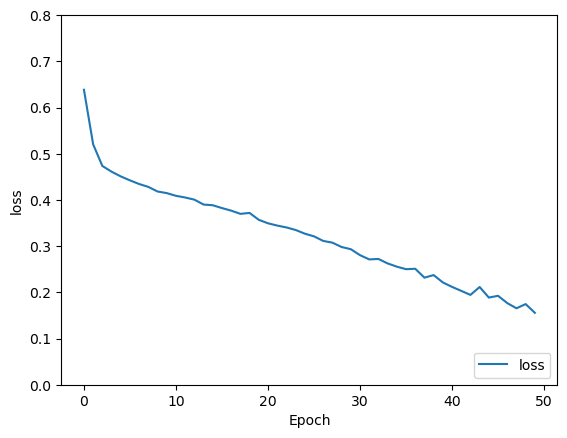

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.8])
plt.legend(loc='lower right')


3/3 - 0s - 21ms/step - accuracy: 0.7662 - loss: 0.9479


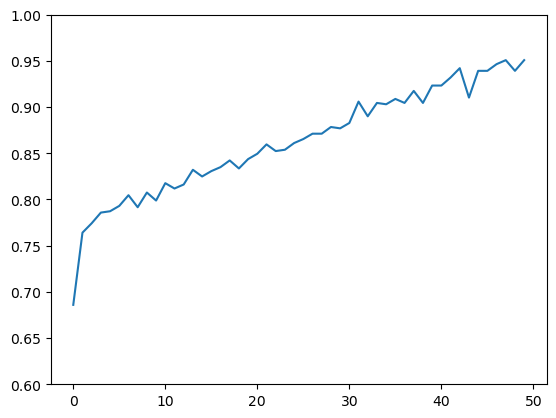

In [15]:
test_loss,test_acc=model.evaluate(xtest,ytest,verbose=2)
plt.ylim([0.6,1])
plt.plot(history.history['accuracy'],label='accuracy')